In [1]:
import sklearn
print(sklearn.__version__)

1.4.2


In [2]:
# pip install --upgrade scikit-learn==1.4.2

In [3]:
import pandas as pd

# 데이터 세트 호출
c_df = pd.read_csv('./datasets/V2_club_region_view.csv', low_memory=False)
c_df

,id,region,club_name,club_intro,club_info,category_name,club_main_category_id
0,1,부산,NCT 좋아요~,NCT를 좋아하는 모임,문화·예술을(를) 좋아하는 사람들이 모인 NCT 좋아요~에 오신 것을 환영합니다.,문화·예술,2
1,2,경기,여행 모임,내가 다닌 여행을 보여줘요,여행 모임은(는) 여행·동행에 관한 다양한 주제로 활동을 합니다.,여행·동행,5
2,3,경북,르세라핌 짱~!,"르세라핌, 아이즈원, 트와이스 짱이에요",문화·예술을(를) 좋아하는 사람들이 모인 르세라핌 짱~!에 오신 것을 환영합니다.,문화·예술,2
3,4,서울,로드 자전거 한,자전거 타면서 운동하실 분,오직 자전거를 좋아하는 성인자전거모임!!\n\n같이 자전거 타고싶어서 직접만듭니다\...,운동·액티비티,3
4,5,서울,인천.부천.서울.경기(94~02년생),인천.부천.서울.경기도(94~02년생)~~ 모임입니다.,저희 모임을 소개합니당~!!\n인천.부천.서울.경기도(94~02년생)~~ 모임입니다...,동네·또래,7
...,...,...,...,...,...,...,...
2263,2267,서울,교육법 학습 클럽,교육법 학습 클럽에서는 스터디에 관한 다양한 주제로 활동을 합니다.,교육법 학습 클럽에서는 스터디에 관한 다양한 주제로 활동을 합니다.,스터디,11
2264,2268,대구,외교 정책 연구 모임,외교 정책 연구 모임에서는 스터디에 관한 다양한 주제로 활동을 합니다.,외교 정책 연구 모임에서는 스터디에 관한 다양한 주제로 활동을 합니다.,스터디,11
2265,2269,제주,사회 정책 연구 모임,사회 정책 연구 모임에서는 스터디에 관한 다양한 주제로 활동을 합니다.,사회 정책 연구 모임에서는 스터디에 관한 다양한 주제로 활동을 합니다.,스터디,11
2266,2270,세종,과학 정치 스터디,과학 정치 스터디에서는 스터디에 관한 다양한 주제로 활동을 합니다.,과학 정치 스터디에서는 스터디에 관한 다양한 주제로 활동을 합니다.,스터디,11


---

### 🌟 1Cycle

In [4]:
# 데이터 프레임 복제
pre_c_df = c_df.copy()

In [5]:
# 불필요한 컬럼 추출
columns = ['id', 'category_name']

# 컬럼 제거
pre_c_df = pre_c_df.drop(labels=columns, axis=1)

In [6]:
# re: 정규 표현식(regular expressions), 문자열 검색 및 조작, 패턴 매칭, 검색 및 치환 등의 작업을 수행
import re

# 피처 컬럼 추출
features_columns = ['region', 'club_name', 'club_intro', 'club_info']

# 특수 문자 제거 후 피처 하나로 연결하는 함수:
def create_features(row):
    # 피처 컬럼이 있다면 str 타입으로 형변환하고 없다면 빈문자열로 변환하여 모든 피처의 값을 묶기
    join_features = ' '.join(str(row[col]) if not pd.isna(row[col]) else '' for col in features_columns)
    # 특수 기호 제거
    clear = re.sub(r'[^\w\s]', ' ', join_features)
    return clear

# 새로운 컬럼 features 생성
pre_c_df['features'] = pre_c_df.apply(create_features, axis=1)

In [7]:
# features와 targets 컬럼 추출
columns = ['features', 'club_main_category_id']

# features, targets 컬럼으로 새로운 데이터 프레임 생성
club_df = pre_c_df[columns]

In [8]:
# 타겟 컬럼명 변경
club_df = club_df.rename(columns={'club_main_category_id': 'targets'})

In [9]:
# 개수가 적은 데이터 제거
pre_club_df = club_df[~((club_df.targets == 12) | (club_df.targets == 13))]

---

### 🌟 2Cycle

In [10]:
# 타겟 분포 확인
pre_club_df.targets.value_counts()

targets
2     206
5     206
3     206
7     206
8     206
9     206
11    206
1     206
4     206
10    206
6     206
Name: count, dtype: int64

In [11]:
# 타겟 데이터 비중 확인
c_target = pre_club_df['targets'].value_counts().reset_index()
c_target

,targets,count
0,2,206
1,5,206
2,3,206
3,7,206
4,8,206
5,9,206
6,11,206
7,1,206
8,4,206
9,10,206


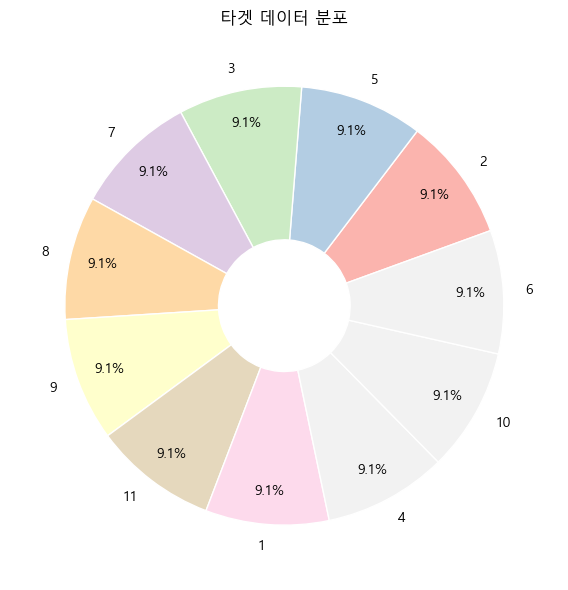

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

plt.figure(figsize=(6, 6))

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

c_counts = c_target['count']
c_labels = c_target['targets']
pct_distance = 0.85

# 그래프 그리기
plt.pie(c_counts, labels=c_labels, colors=outer_colors, autopct='%1.1f%%', startangle=20, wedgeprops=wedgeprops, pctdistance=pct_distance)
plt.title('타겟 데이터 분포')
# plt.legend()

plt.tight_layout()
plt.show()

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과, micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다).
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다).
# 타겟 데이터의 비중이 많이 차이난다면, micro방식을 사용하는 것이 바람직하다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_club_df.features, pre_club_df.targets

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, random_state=124)

# 검증용 데이터 세트 분리
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

parameters = {
    'count_vectorizer__ngram_range': [
        (1, 1), (2, 2), (2, 3), (3, 4), (4, 5)
    ], 
    'multinomial_NB__alpha': [
        0.1, 0.5, 1, 5
    ]   
}

m_nb_pipe = Pipeline([('count_vectorizer', CountVectorizer()), 
                      ('multinomial_NB', MultinomialNB())])

In [16]:
t_m_nb = GridSearchCV(
    m_nb_pipe, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

t_m_nb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                       ('multinomial_NB', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'count_vectorizer__ngram_range': [(1, 1), (2, 2),
                                                           (2, 3), (3, 4),
                                                           (4, 5)],
                         'multinomial_NB__alpha': [0.1, 0.5, 1, 5]},
             return_train_score=True)

In [17]:
t_m_nb = t_m_nb.best_estimator_

In [18]:
prediction = t_m_nb.predict(X_train)

오차 행렬
[[154   0   0   0   0   0   0   0   0   0   0]
 [  0 154   0   0   0   0   0   0   0   0   0]
 [  0   0 154   0   0   0   0   0   0   0   0]
 [  0   0   0 155   0   0   0   0   0   0   0]
 [  0   0   0   0 154   0   0   0   0   0   0]
 [  0   0   0   0   0 155   0   0   0   0   0]
 [  0   0   0   0   0   0 155   0   0   0   0]
 [  0   0   0   0   0   0   0 154   0   0   0]
 [  0   0   0   0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0   0   0   0 155   0]
 [  0   0   0   0   0   0   0   0   0   0 154]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


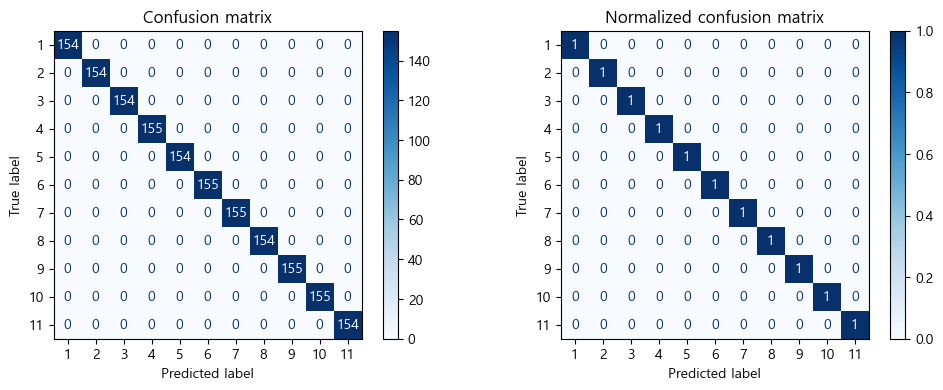

In [19]:
get_evaluation(y_train, prediction, t_m_nb, X_train)

In [20]:
v_m_nb = GridSearchCV(
    m_nb_pipe, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

v_m_nb.fit(X_val_train, y_val_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                       ('multinomial_NB', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'count_vectorizer__ngram_range': [(1, 1), (2, 2),
                                                           (2, 3), (3, 4),
                                                           (4, 5)],
                         'multinomial_NB__alpha': [0.1, 0.5, 1, 5]},
             return_train_score=True)

In [21]:
v_m_nb = v_m_nb.best_estimator_

In [22]:
prediction = v_m_nb.predict(X_val_train)

오차 행렬
[[123   0   0   0   0   0   0   0   0   0   0]
 [  0 124   0   0   0   0   0   0   0   0   0]
 [  0   0 123   0   0   0   0   0   0   0   0]
 [  0   0   0 124   0   0   0   0   0   0   0]
 [  0   0   0   0 123   0   0   0   0   0   0]
 [  0   0   0   0   0 124   0   0   0   0   0]
 [  0   0   0   0   0   0 124   0   0   0   0]
 [  0   0   0   0   0   0   0 123   0   0   0]
 [  0   0   0   0   0   0   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0   0 124   0]
 [  0   0   0   0   0   0   0   0   0   0 123]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


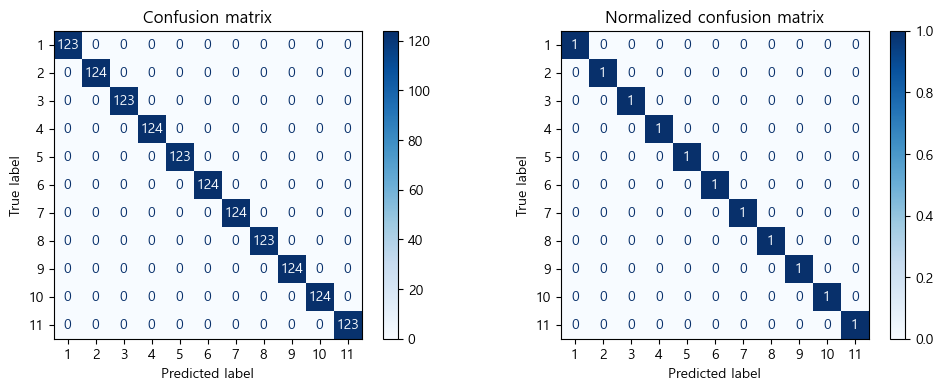

In [23]:
get_evaluation(y_val_train, prediction, v_m_nb, X_val_train)

In [24]:
te_m_nb = GridSearchCV(
    m_nb_pipe, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

te_m_nb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                       ('multinomial_NB', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'count_vectorizer__ngram_range': [(1, 1), (2, 2),
                                                           (2, 3), (3, 4),
                                                           (4, 5)],
                         'multinomial_NB__alpha': [0.1, 0.5, 1, 5]},
             return_train_score=True)

In [25]:
# 훈련 결과 확인
result_df = pd.DataFrame(te_m_nb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
result_df

,params,mean_test_score,rank_test_score
0,"{'count_vectorizer__ngram_range': (1, 1), 'mul...",0.968792,7
1,"{'count_vectorizer__ngram_range': (1, 1), 'mul...",0.949370,11
2,"{'count_vectorizer__ngram_range': (1, 1), 'mul...",0.939367,14
3,"{'count_vectorizer__ngram_range': (1, 1), 'mul...",0.906404,18
4,"{'count_vectorizer__ngram_range': (2, 2), 'mul...",0.974675,5
5,"{'count_vectorizer__ngram_range': (2, 2), 'mul...",0.948782,12
6,"{'count_vectorizer__ngram_range': (2, 2), 'mul...",0.936415,16
7,"{'count_vectorizer__ngram_range': (2, 2), 'mul...",0.905225,19
8,"{'count_vectorizer__ngram_range': (2, 3), 'mul...",0.978214,3
9,"{'count_vectorizer__ngram_range': (2, 3), 'mul...",0.954079,10


In [26]:
result_df[result_df['rank_test_score'] == 1]['params'].values

array([{'count_vectorizer__ngram_range': (4, 5), 'multinomial_NB__alpha': 0.1}],
      dtype=object)

In [27]:
result_df[result_df['rank_test_score'] == 16]['params'].values

array([{'count_vectorizer__ngram_range': (2, 2), 'multinomial_NB__alpha': 1}],
      dtype=object)

In [28]:
te_m_nb = te_m_nb.best_estimator_

In [29]:
prediction = te_m_nb.predict(X_test)

오차 행렬
[[52  0  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0  0]
 [ 0  0 49  3  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  0  0]
 [ 0  0  1  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  0  0  0  0  0 51]]
정확도: 0.9912, 정밀도: 0.9912, 재현율: 0.9912, F1: 0.9912
################################################################################


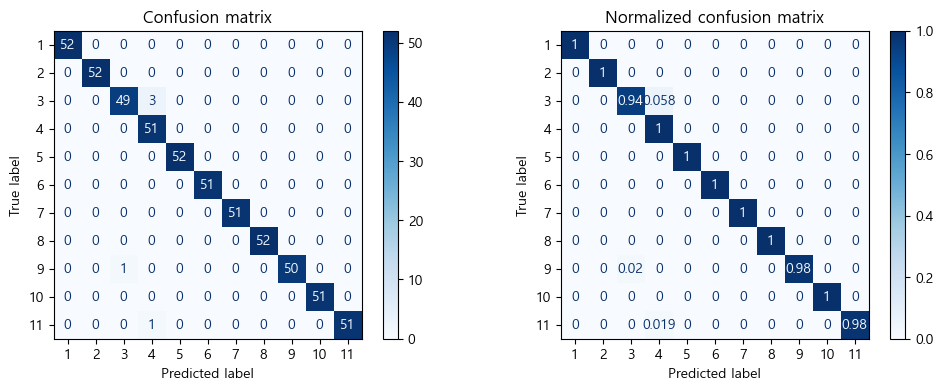

In [30]:
get_evaluation(y_test, prediction, te_m_nb, X_test)

In [31]:
# 모델의 클래스 레이블 확인
print(te_m_nb.classes_)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [32]:
# 테스트 (대표 카테고리 + 키워드 학습)
probabilities = te_m_nb.predict_proba(['여행 동행 바다 산 여름 시원한'])
probabilities

array([[0.09064155, 0.09064155, 0.09064155, 0.09123014, 0.09064155,
        0.09123014, 0.09123014, 0.09064155, 0.09123014, 0.09123014,
        0.09064155]])

#### 🚩 2Cycle 결과
정확도: 0.9912, 정밀도: 0.9912, 재현율: 0.9912, F1: 0.9912

- 전체적인 수치가 거의 1에 가깝게 나타남으로 과적합이 의심됨
- 테스트 결과 모든 확률이 거의 동일하게 나타남에 따라 키워드에 따른 카테고리 분류를 제대로 찾지 못한다는 것을 확인함.
- 결과값이 16등인 {'count_vectorizer__ngram_range': (2, 2), 'multinomial_NB__alpha': 1} 파라미터 값을 사용하여 과적합을 해소하고자 함